## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained Visual Transformer.

In [1]:
import json
from PIL import Image

import torch
from torchvision import transforms

from pytorch_pretrained_vit import ViT

In [3]:
model_name = 'B_16_imagenet1k'
model = ViT(model_name, pretrained=True)

Downloading: "https://github.com/lukemelas/PyTorch-Pretrained-ViT/releases/download/0.0.2/B_16_imagenet1k.pth" to /home/luke/.cache/torch/hub/checkpoints/B_16_imagenet1k.pth



Loaded pretrained weights.


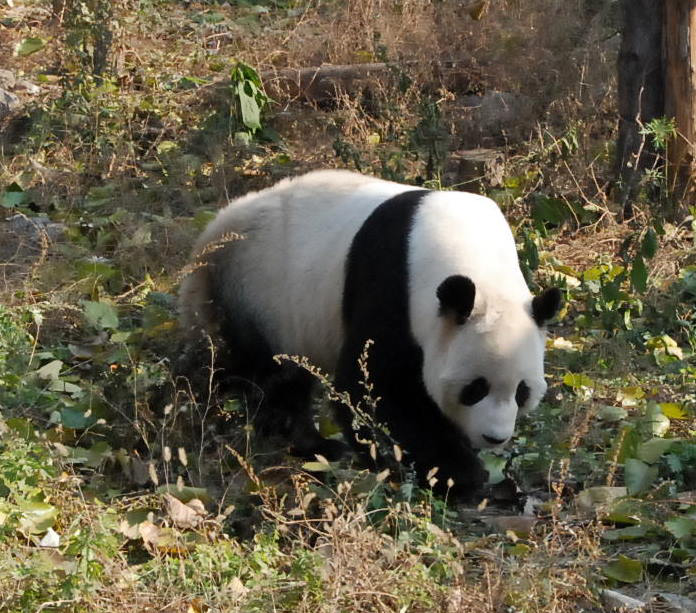

In [4]:
# Open image
img = Image.open('img.jpg')
img

In [5]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(model.image_size), transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),])
img = tfms(img).unsqueeze(0)

In [6]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [7]:
# Classify
model.eval()
with torch.no_grad():
    outputs = model(img).squeeze(0)
print('-----')
for idx in torch.topk(outputs, k=3).indices.tolist():
    prob = torch.softmax(outputs, -1)[idx].item()
    print('[{idx}] {label:<75} ({p:.2f}%)'.format(idx=idx, label=labels_map[idx], p=prob*100))

-----
[388] giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (99.51%)
[387] lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.16%)
[297] sloth bear, Melursus ursinus, Ursus ursinus                                 (0.05%)
